In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl

data = pd.read_excel('saltwater_ML_2.xlsx', sheet_name='pearl plot')

class_mapping = {
    0: 'Australia saltwater',
    1: 'Bahrain saltwater',
    2: 'Japan saltwater',
    3: 'Qatar saltwater',
}

X = data[['d18O_VPDB_mineral', 'd13C_VPDB']].values
y = data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pearlsvm = SVC(kernel='rbf', C=1, gamma=1, probability=True)


pearlsvm.fit(X_train, y_train)
y_pred = pearlsvm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction: {y_pred}')
print(f'Ground truth: {y_test}')
print(f'Accuracy: {accuracy}')



Prediction: [2 3 2 2 1 2 2 0 1 2 2 1 1 2 0 2 2 1 2 0 2 2 2 1 2 2 2 1 1 2 2 1 1 2 2 2 0
 2 2 3 2 2 2 2]
Ground truth: [2 3 2 2 1 2 2 0 3 2 2 1 3 1 0 2 2 1 2 0 2 2 2 1 2 2 2 1 1 2 2 1 3 2 2 2 0
 2 2 3 2 2 2 2]
Accuracy: 0.9090909090909091


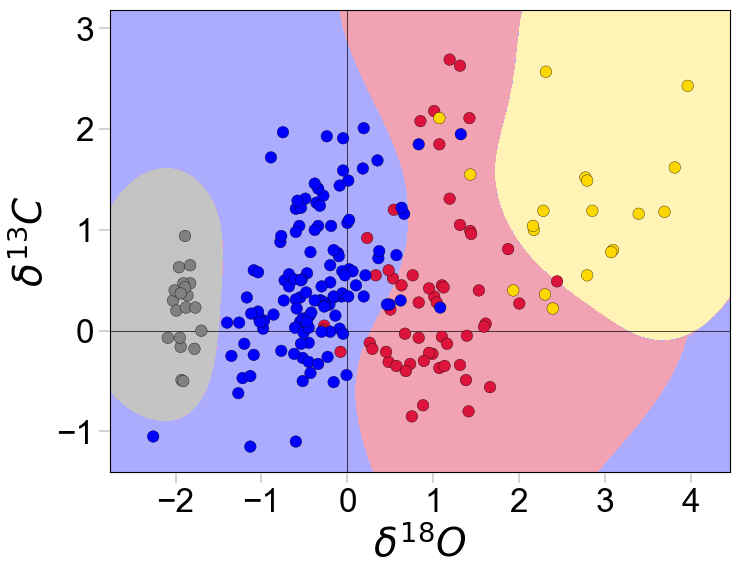

In [18]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                         np.arange(y_min, y_max, 0.005))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    colors = ['gray', 'crimson', 'blue', 'gold']
    colors_db = ["#C4C4C4", "#F1A3B3", "#ACACFF", "#FFF4B5"]
    cmap = ListedColormap(colors)
    cmap_db = ListedColormap(colors_db)
    ax.contourf(xx, yy, Z, cmap=cmap_db, zorder=1)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=70, edgecolor='k', linewidth=0.25, zorder=4)
    
    # handles = scatter.legend_elements()[0]
    # labels = [class_mapping[i] for i in [0, 1, 2, 3]]
    # legend1 = ax.legend(handles, labels, loc='upper left', fontsize=24)
    # ax.add_artist(legend1)
    
    ax.axhline(0, color='black', linewidth=0.5, zorder=2)
    ax.axvline(0, color='black', linewidth=0.5, zorder=3)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_ylabel(r'$\delta^{13}C$', fontsize=28)
    ax.set_xlabel(r'$\delta^{18}O$', fontsize=28)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_tick_params(width=0.25, length=8, labelsize=24)
    ax.yaxis.set_tick_params(width=0.25, length=8, labelsize=24)
    

# Create a plot
fig, ax = plt.subplots(figsize=(8,6))
plot_decision_boundary(X, y, pearlsvm, ax)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
# output_file_path = 'fig2_svm.pdf'
# plt.savefig(output_file_path, bbox_inches='tight',format='pdf', dpi=600)


plt.show()

In [ ]:
x_value, y_value = -2, 0.5
new_data_point = np.array([[x_value, y_value]])

predicted_class = pearlsvm.predict(new_data_point)
predicted_class_name = class_mapping[predicted_class[0]]
predicted_probabilities = pearlsvm.predict_proba(new_data_point)
confidence = predicted_probabilities[0][predicted_class[0]]

print(f'The predicted class for the new data point ({x_value}, {y_value}) is: {predicted_class_name}, with a confidence of: {confidence:.2f}')

The predicted class for the new data point (-2, 0.5) is: Australia saltwater, with a confidence of: 0.91
